In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV, RFE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold

In [2]:
# load the preprocessed data
cleaned_data  = pd.read_csv("Cleaned_data_53v_Final.csv")

In [3]:
X = cleaned_data.drop(columns=['target'])
y = cleaned_data['target']

In [4]:
smote_enn = SMOTEENN(random_state=42, sampling_strategy='minority')
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, 
                                                    test_size=0.20, random_state=42)

## Stepwise - Selection

### recall - XGBoost

In [9]:
cv = StratifiedKFold(n_splits=5)

In [12]:
model = XGBClassifier()

In [13]:
# ref: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='recall', n_jobs=-1, verbose=3)
rfecv.fit(X_train, y_train)

Fitting estimator with 52 features.
Fitting estimator with 52 features.
Fitting estimator with 52 features.
Fitting estimator with 52 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 51 features.
Fitting estimator with 51 features.
Fitting estimator with 51 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 50 features.
Fitting estimator with 50 features.
Fitting estimator with 50 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 49 features.
Fitting estimator with 49 features.
Fitting estimator with 49 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 48 features.
Fitting estimator with 48 features.
Fitting estimator with 48 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 47 features.
Fitting estimator with 47 fe

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...),
      n_jobs=-1, scoring='recall', verbose=3)

In [15]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 48


In [18]:
selected_features = X_train.columns[rfecv.support_]
print('Selected features: {}'.format(selected_features))

Selected features: Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'fico_range_low', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'total_rev_hi_lim', 'avg_cur_bal', 'bc_open_to_buy',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_op_rev_tl', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tot_hi_cred_lim',
       'total_bc_limit', 'annual_inc_installment', 'annual_inc_dti',
       'loan_amnt_dti', 'home_ownership_MORTGAGE', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_small_business',
       'application_type_Joint App', 'region_SouthEast', 'region_West',
       'annual_inc_binned_Low', 'annual_inc_binned_Medium',
   

In [16]:
results = pd.DataFrame(rfecv.cv_results_)

In [3]:
results

,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,0.916465,0.005131,0.912893,0.922984,0.917326,0.908713,0.920407
1,0.915443,0.003923,0.911310,0.918889,0.917158,0.910212,0.919647
2,0.913851,0.003229,0.912260,0.917094,0.910338,0.911246,0.918317
3,0.910870,0.003529,0.905250,0.914835,0.908734,0.914033,0.911498
4,0.907724,0.003793,0.900521,0.907763,0.909578,0.909262,0.911498
5,0.901822,0.003262,0.897502,0.899297,0.902400,0.906982,0.902926
6,0.900981,0.003171,0.897650,0.900458,0.900289,0.907003,0.899506
7,0.901834,0.002266,0.898516,0.901070,0.900817,0.904533,0.904235
8,0.904241,0.000952,0.902379,0.904680,0.904638,0.904448,0.905058
9,0.907834,0.001233,0.908122,0.906517,0.908079,0.906581,0.909872


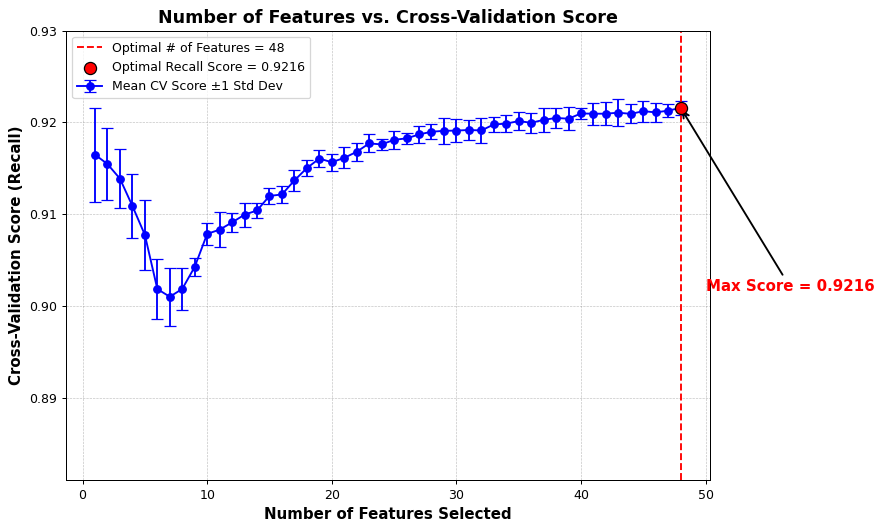

In [77]:
mean_test_score = rfecv.cv_results_['mean_test_score']
std_test_score = rfecv.cv_results_['std_test_score']
features = range(1, len(mean_test_score) + 1)

plt.figure(dpi=90, figsize=(10, 6))
plt.xlabel("Number of Features Selected", fontweight='bold', fontsize=12)
plt.ylabel("Cross-Validation Score (Recall)", fontweight='bold', fontsize=12)
plt.title("Number of Features vs. Cross-Validation Score", fontweight='bold', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

plt.errorbar(features, mean_test_score, yerr=std_test_score, fmt='-o', color='b', 
             label='Mean CV Score ±1 Std Dev', capsize=5, capthick=1)

# optimal number of features
optimal_feat = rfecv.n_features_
optimal_score = mean_test_score[optimal_feat - 1]  # starting from 0
plt.axvline(x=optimal_feat, color='r', linestyle='--', label=f'Optimal # of Features = {optimal_feat}')
plt.scatter(optimal_feat, optimal_score, color='r', edgecolor='k', s=94, zorder=5, label=
            f'Optimal Recall Score = {optimal_score:.4f}')  # marker for the optimal point

# try to show the maximum score
max_score = np.max(mean_test_score)
max_score_index = np.argmax(mean_test_score) + 1  # to start from 1
plt.annotate(f'Max Score = {max_score:.4f}', xy=(max_score_index, max_score), 
             xytext=(max_score_index + 2, max_score - 0.02),
             arrowprops=dict(facecolor='red', arrowstyle='->', lw=1.5), 
             fontsize=12, color='r', weight='bold')
plt.legend(loc='best', fontsize=10)
plt.tight_layout()

# stop at 0.93 for the y-axis to better view the result
plt.ylim([min(mean_test_score) - 0.02, 0.93])
plt.show()

In [56]:
model_imp = RandomForestClassifier(n_estimators=100, random_state=42)

In [58]:
model_imp.fit(X_train[selected_features], y_train)
y_pred = model_imp.predict(X_test[selected_features])

In [59]:
feature_importances = model_imp.feature_importances_
feature_names = X_train[selected_features].columns

importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

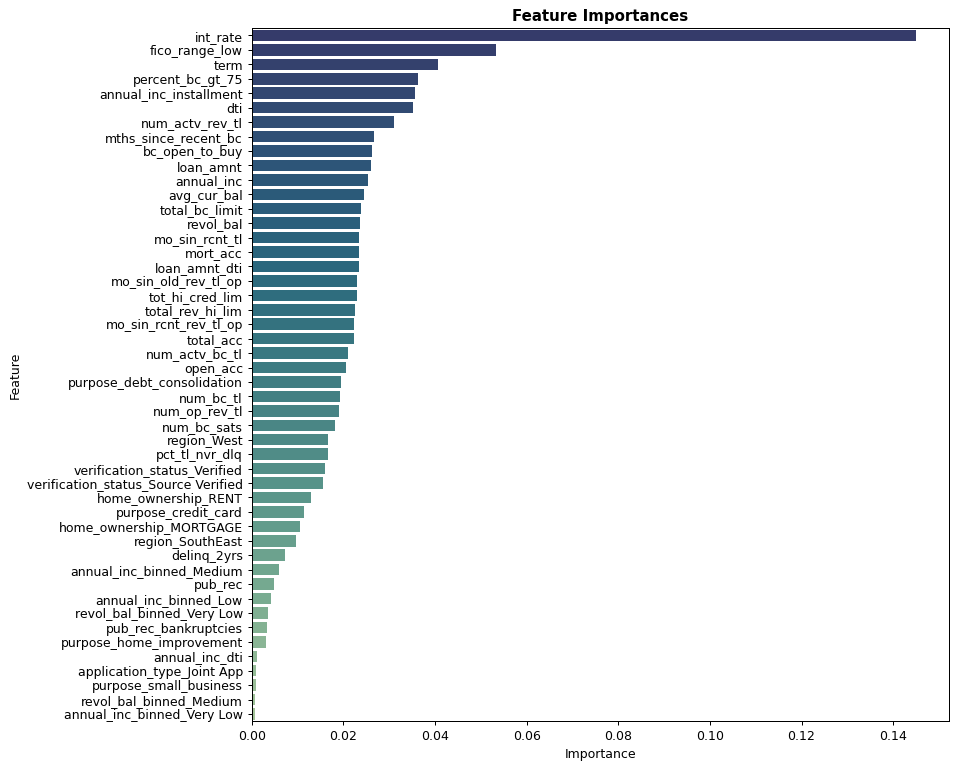

In [81]:
plt.figure(figsize=(10, 10), dpi=90)
sns.barplot(x='Importance', y='Feature', data=importances, palette='crest_r')
plt.title('Feature Importances', fontweight='bold')
plt.show()

In [83]:
corr = cleaned_data[list(selected_features) + list(['target'])].corr()['target'].sort_values(ascending=False)
corr

target                                 1.000000
int_rate                               0.255736
term                                   0.177567
dti                                    0.107189
loan_amnt_dti                          0.092038
percent_bc_gt_75                       0.071067
num_actv_rev_tl                        0.070445
loan_amnt                              0.069034
verification_status_Verified           0.065640
home_ownership_RENT                    0.065591
annual_inc_binned_Low                  0.046600
num_actv_bc_tl                         0.042529
purpose_debt_consolidation             0.036677
num_op_rev_tl                          0.034144
open_acc                               0.027435
pub_rec                                0.025559
purpose_small_business                 0.024243
verification_status_Source Verified    0.023713
pub_rec_bankruptcies                   0.023318
delinq_2yrs                            0.019757
num_bc_sats                            0

In [85]:
col = corr.abs().sort_values(ascending=False).index.tolist()

In [87]:
final = cleaned_data[col]

In [19]:
# corr = final.corr()[['target']]

# plt.figure(figsize=(7,10))
# sns.heatmap(corr, annot=True, cmap=plt.cm.Blues)
# plt.show()

In [20]:
# final.to_csv('final_data_V2.csv', index = False)